<h1>Data Engineering Test<h1>

In [172]:
import pandas as pd
import numpy as np

In [173]:
Data = pd.read_csv('stayforlong_bookings.csv') 



df = Data.copy()
df.head()

,hotel,is_canceled,booking_to_arrival_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,parking_lot,total_of_special_requests,reservation_status,reservation_status_date
0,Apartment,0,277,2015,October,41,6,2,5,2,...,No Deposit,273.0,NaN,0,Transient-Party,77.29,0,0,Check-Out,2015-10-13
1,Hotel,1,109,2016,February,9,21,2,1,2,...,Non Refund,19.0,NaN,44,Transient,75.00,0,0,Canceled,2015-12-18
2,Hotel,0,102,2015,October,42,16,0,2,2,...,No Deposit,6.0,NaN,0,Transient-Party,109.00,0,0,Check-Out,2015-10-18
3,Apartment,1,35,2017,April,15,13,1,3,2,...,No Deposit,240.0,NaN,0,Transient,162.00,0,0,Canceled,2017-03-09
4,Hotel,1,164,2017,June,24,14,0,3,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,0,Canceled,2017-06-12


In [174]:
##check if the dataset contains a None values##

df.isnull().values.any() # reture True so further checking required 

df.isnull().sum().sort_values()[-5:]

Data.dtypes



hotel                              object
is_canceled                         int64
booking_to_arrival_time             int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
board                              object
country                            object
market_segment                     object
acquisition_channel                object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [175]:
#missing values from children, comapny, agent (data types float64) country (data types object)

df['children'] = df['children'].fillna(0)

df[['company', 'agent', 'country']] = df[['company', 'agent', 'country']].fillna('NULL')

#df.head()
#df.isnull().sum().sort_values()[-5:]
df.isnull().sum().sort_values()
df.isnull().values.any()

df.dtypes



hotel                              object
is_canceled                         int64
booking_to_arrival_time             int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
board                              object
country                            object
market_segment                     object
acquisition_channel                object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [176]:
df_guest_orgin = df.copy()

<h2>What are the most popular guest origin countries? <h2>

In [177]:
#df = df[df['is_canceled'] == 0]
#country_name = df['country'].unique()

#country = Data.groupby(['country']).size().reset_index(name='count').sort_values(ascending=False, by=['count'])
country = df_guest_orgin.groupby(['country']).size().sort_values(ascending=False) #.reset_index(name='count').sort_values(ascending=False, by=['count'])

#most_popular_guest_orgin
#country_name

country.head(10)#48499


country
SOM    48590
TON    12129
GMB    10415
WLF     8568
DEU     7287
ITA     3766
COK     3375
BEL     2342
BRA     2224
NLD     2104
dtype: int64

In [182]:
#TODO check with the team leader if he wanna looking for confirmed booking or all booking confirmed and canceled

In [191]:
# filtering the data by removing the canceled booking

country_without_canceltion = df_guest_orgin[df_guest_orgin['is_canceled'] == 1 ]

country_without_canceltion_sorted = country_without_canceltion.groupby(['country']).size().sort_values(ascending=False)

country_without_canceltion_sorted.head(10)

country
SOM    27519
TON     2453
WLF     2177
GMB     1934
ITA     1333
DEU     1218
COK      832
BRA      830
VUT      501
BEL      474
dtype: int64

In [163]:


#date = Data['arrival_date_month'] +  Data['arrival_date_year']
# In[17]:df['combined']=df['bar'].astype(str)+'_'+df['foo']+'_'+df['new']

df['date_combined'] = df['arrival_date_day_of_month'].astype(str) + '/' + df['arrival_date_month'] + '/' + df['arrival_date_year'].astype(str)


#Data['date_combined'].head()
df.head()


,hotel,is_canceled,booking_to_arrival_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,parking_lot,total_of_special_requests,reservation_status,reservation_status_date,date_combined
0,Apartment,0,277,2015,October,41,6,2,5,2,...,273.0,NULL,0,Transient-Party,77.29,0,0,Check-Out,2015-10-13,6/October/2015
2,Hotel,0,102,2015,October,42,16,0,2,2,...,6.0,NULL,0,Transient-Party,109.00,0,0,Check-Out,2015-10-18,16/October/2015
6,Hotel,0,101,2016,May,22,25,0,4,2,...,9.0,NULL,0,Transient-Party,132.60,0,0,Check-Out,2016-05-29,25/May/2016
7,Hotel,0,246,2017,July,30,29,2,1,2,...,9.0,NULL,0,Transient,125.10,0,2,Check-Out,2017-08-01,29/July/2017
9,Hotel,0,41,2017,April,17,24,1,3,2,...,85.0,NULL,0,Transient,99.00,0,2,Check-Out,2017-04-28,24/April/2017


<h2>What is the room price per night?<h2>

In [ ]:
#adr: Booking cost divided by the number of nights. (Average Daily Rate) adr = booking cost / number of nights

In [192]:
#df_room_price_per_night = df[df['adr' , 'stays_in_weekend_nights']]

df_room_price = df[['adr', 'stays_in_weekend_nights', 'stays_in_week_nights']]

df_room_price

,adr,stays_in_weekend_nights,stays_in_week_nights
0,77.29,2,5
1,75.00,2,1
2,109.00,0,2
3,162.00,1,3
4,117.00,0,3
...,...,...,...
119385,135.00,0,3
119386,65.00,0,2
119387,164.00,0,2
119388,130.00,0,1


<h2>How does the previous price vary throughout the year?<h2>

In [ ]:
# calcluate the rataion and price different yearly

In [ ]:
d

<h2>What is the distribution of guests per month?<h2>

In [ ]:
# where are the guests locatated monthly , in which hotel are mostly, arrival_date_month is unique 

In [120]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

dist_of_guest = df['arrival_date_month'].value_counts().reindex(months)

#dist_of_guest.describe()

df2 = dist_of_guest

df2

January       5929
February      8068
March         9794
April        11089
May          11791
June         10939
July         12661
August       13877
September    10508
October      11160
November      6794
December      6780
Name: arrival_date_month, dtype: int64

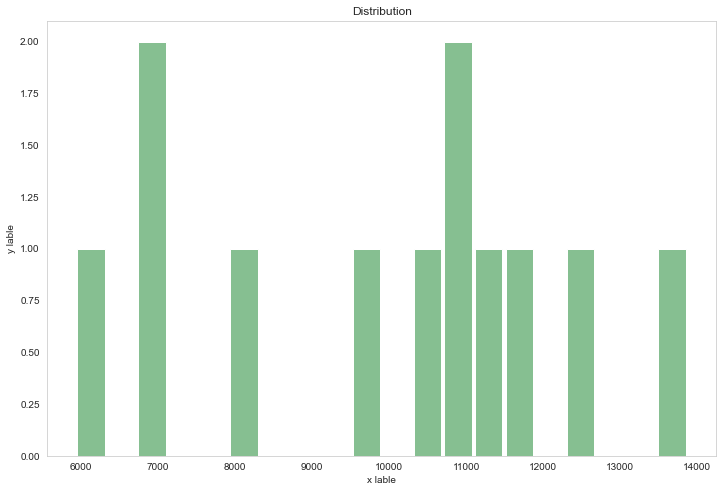

<AxesSubplot:>

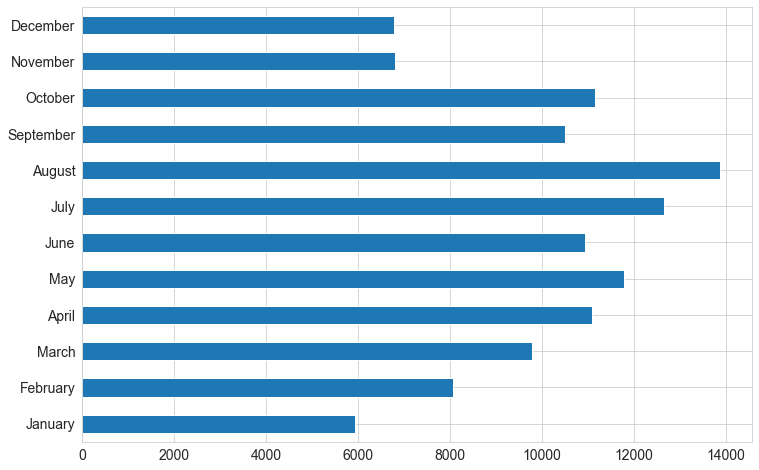

In [126]:
import matplotlib.pyplot as plt
#column='session_duration_seconds', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9
df2.hist( bins = 20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.title('Distribution')
plt.xlabel('x lable')
plt.ylabel('y lable')
plt.show()
df2.plot(kind="barh", fontsize=14, figsize=(12,8))


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


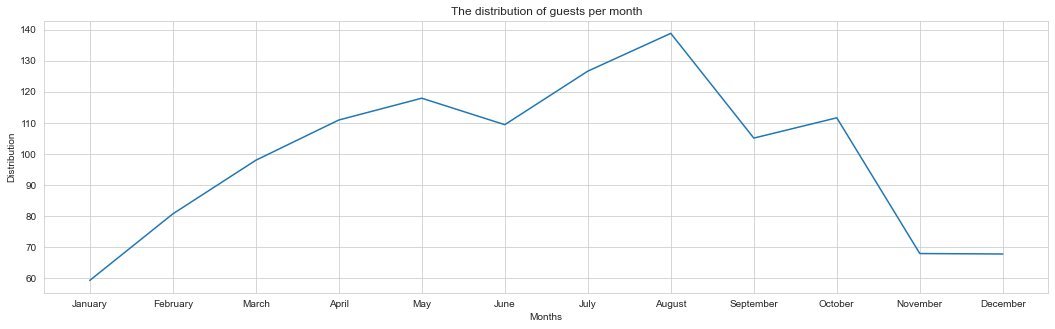

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

x = dist_of_guest.index

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(18, 5))
ax.set_title("The distribution of guests per month")
ax.set_xlabel('Months')
ax.set_ylabel('Distribution')


y=dist_of_guest/dist_of_guest.sum()*100
sns.lineplot(x,dist_of_guest/100, ax=ax)

plt.show()



<h2>For how long do guests book their stays?<h2>

In [136]:
#calculting the total number of stay by combing all nights within the week

book_stays = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

book_stays.describe()




count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'The distribution of guests per month'}, xlabel='Number of Night', ylabel='Number of Booking'>

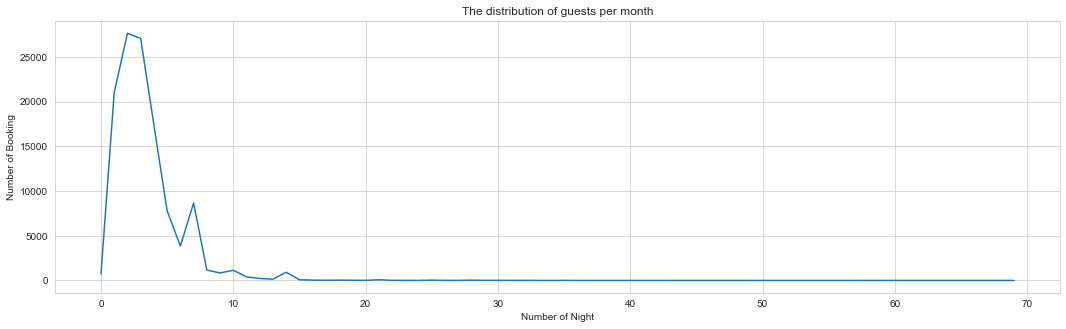

In [137]:
book_stays_counts = book_stays.value_counts()
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(18, 5))
ax.set_title("The distribution of guests per month")
ax.set_xlabel('Number of Night')
ax.set_ylabel('Number of Booking')

sns.lineplot(book_stays_counts.index,book_stays_counts, ax=ax)